![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [3]:
penguins_df.duplicated().sum()

0

In [4]:
penguins_df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [5]:
penguins_df.describe().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.0,332.0,332.0,332.0
mean,44.02,17.15,201.0,4.206e+03
std,5.452,1.96,14.04,806.4
min,32.1,13.1,172.0,2.7e+03
25%,39.5,15.6,190.0,3.55e+03
50%,44.7,17.3,197.0,4.025e+03
75%,48.62,18.7,213.0,4.781e+03
max,59.6,21.5,231.0,6.3e+03


## Perform preprocessing steps on the dataset to create dummy variables


In [6]:
df=pd.get_dummies(penguins_df,columns=['sex'])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [7]:
standard= StandardScaler()


In [8]:
features = df.values
standardized_features = standard.fit_transform(features)
print(standardized_features)

[[-0.90390586  0.79035987 -1.42534179 -0.56694801 -0.99399394  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747  1.00604235 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343  1.00604235 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363 -0.99399394  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768  1.00604235 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985 -0.99399394  0.99399394]]


## Detect the optimal number of clusters for k-means clustering


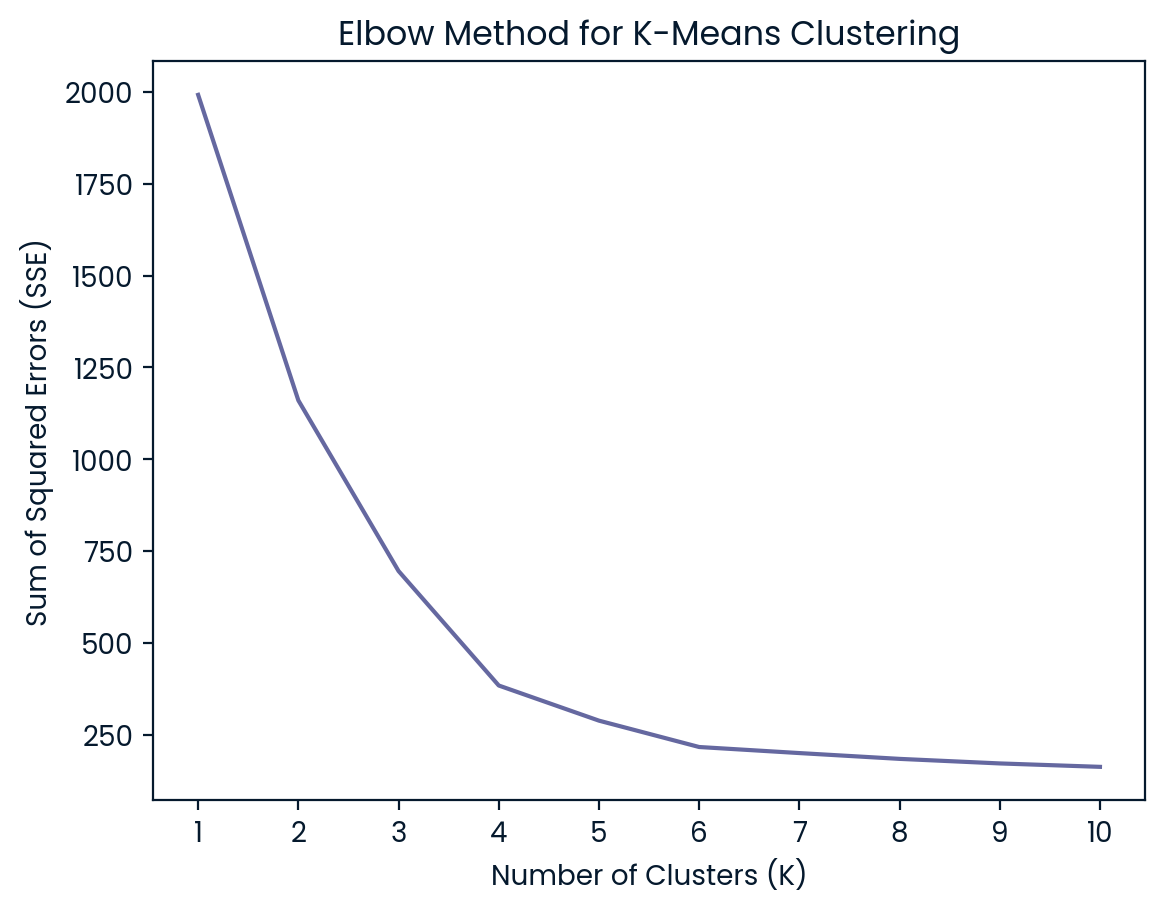

In [9]:
sse = []
for k in range(1, 11):  # Change the range to match the x-axis range
    model = KMeans(n_clusters=k)
    model.fit(standardized_features)
    sse.append(model.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for K-Means Clustering")
plt.show()

## Run the k-means clustering algorithm

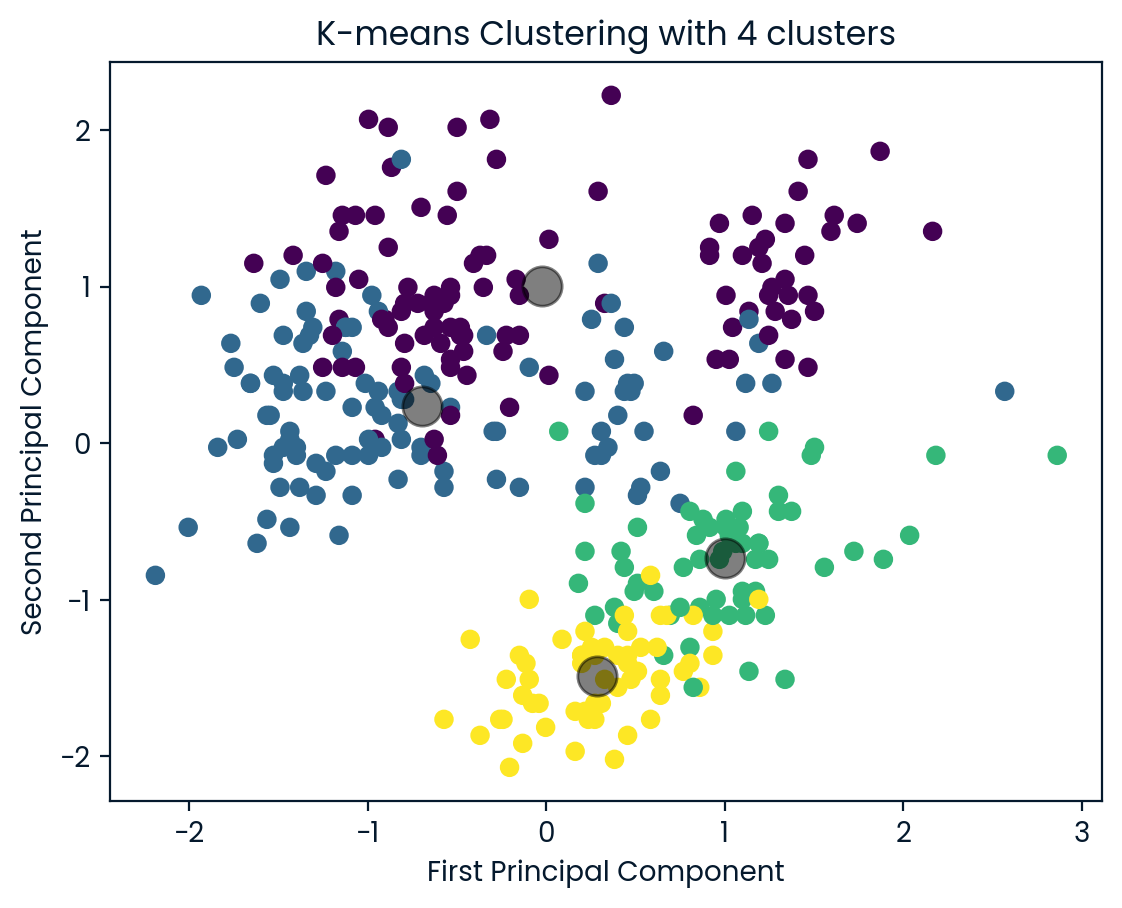

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(standardized_features)
centers = kmeans.cluster_centers_
plt.scatter(standardized_features[:, 0], standardized_features[:, 1], c=kmeans.labels_, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering with 4 clusters")
plt.show()

## Create a final statistical DataFrame for each cluster.

In [11]:
numerical_columns = [col for col in penguins_df.columns if pd.api.types.is_numeric_dtype(penguins_df[col])]
penguins_df['label']=kmeans.labels_
stat_penguins=penguins_df.groupby('label')[numerical_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,49.473770,15.718033,221.540984,5484.836066
3,45.563793,14.237931,212.706897,4679.741379


# Project Development

## t-SNE Dimensionality Reduction 2D map 

<function matplotlib.pyplot.show(close=None, block=None)>

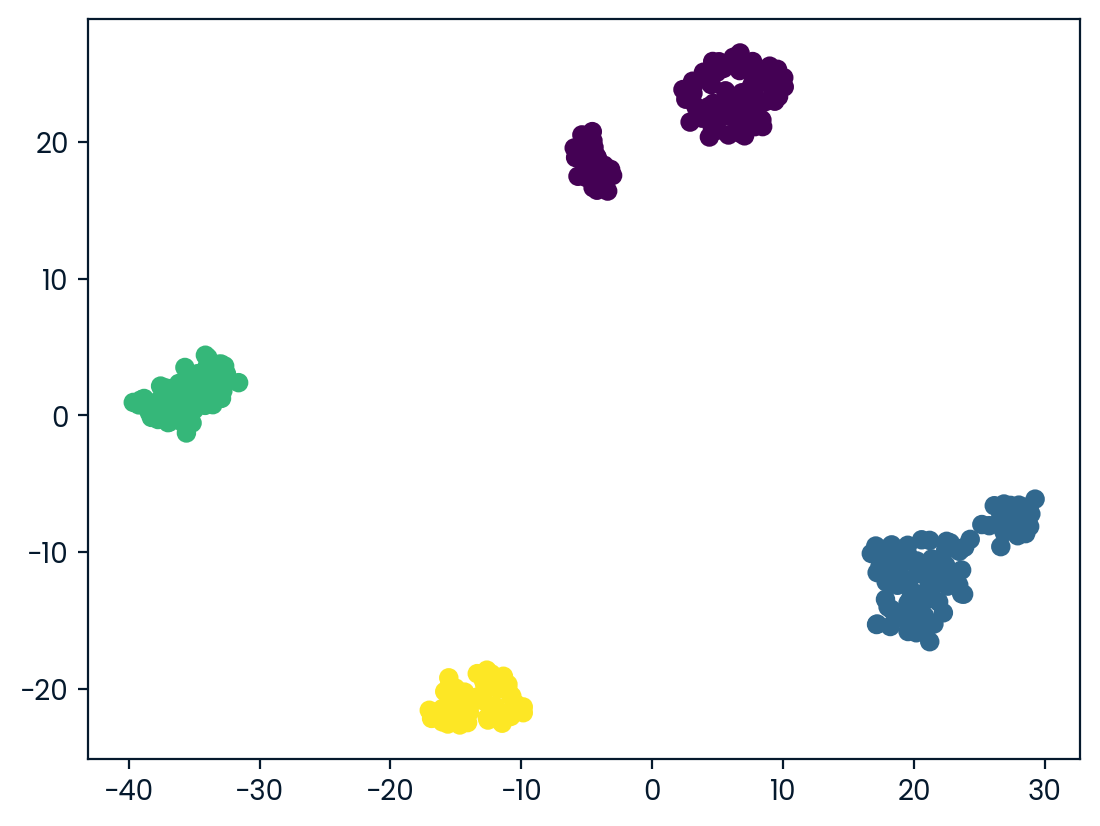

In [12]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=200)
transformed= model.fit_transform(standardized_features)
xs= transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=penguins_df['label'])
plt.show

- As you can see t-SNE can visualize higher dimensional features without worring about loosing much information about the spaces and samilarities between data points.
It shows 4 distinguished classes ,however there is a 5th class that not so different from the 3rd class (the one you seeing on the upper left)
- Althogh we have more than 3 dimensions, not all of them necessarly intdroduce valuable iformation to describe an object, in this situation we need to consider only the important features (intrinsic dimensions) that indroduce high variations to the object describtion and make a good use of dimensionality reduction using PCA.

## Dimensionality Reduction using Principal Component Analysis PCA

In [13]:
from sklearn.decomposition import PCA

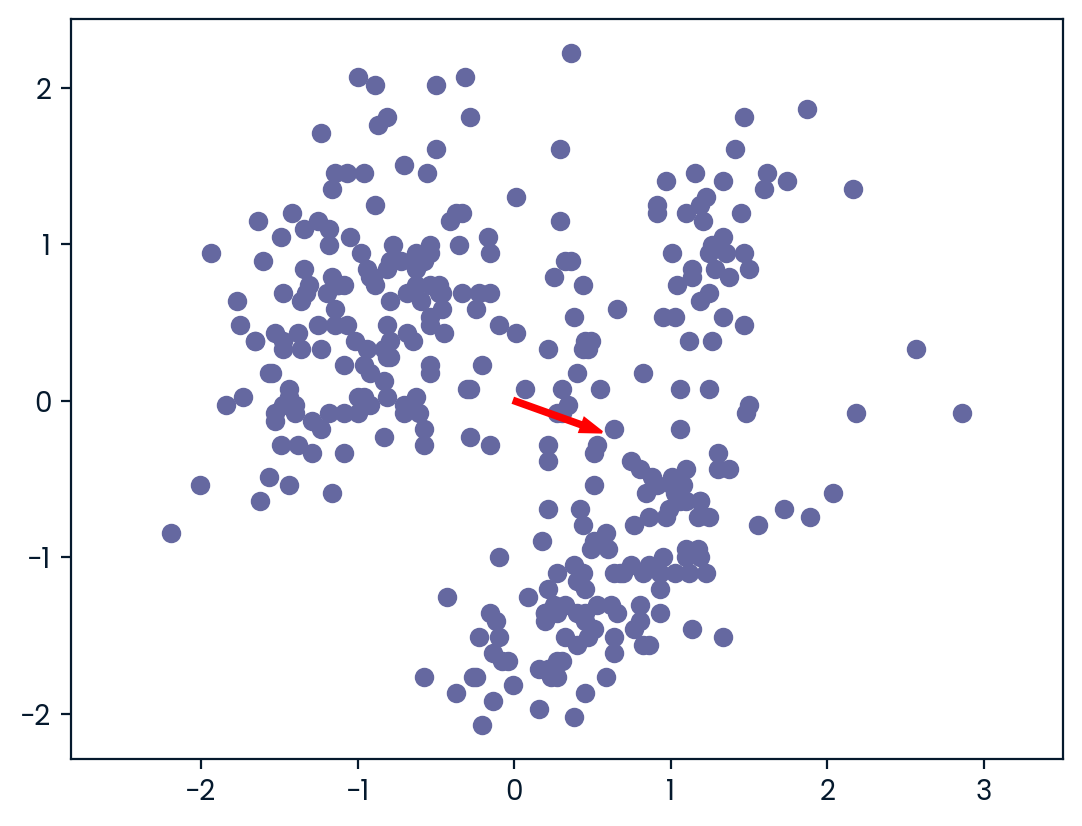

In [14]:
# Make a scatter plot of the untransformed points
plt.scatter(standardized_features[:,0], standardized_features[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(standardized_features)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.03)

# Keep axes on same scale
plt.axis('equal')
plt.show()

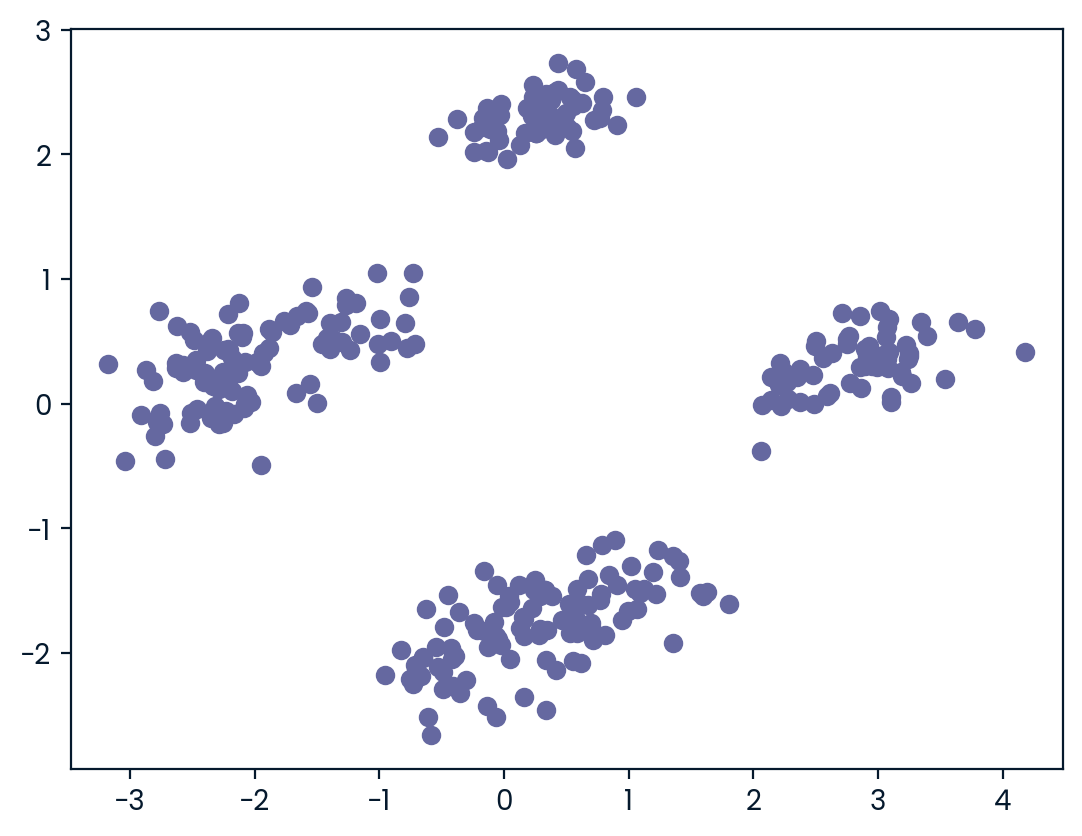

-4.828934832296766e-18 1.0000000000000369


In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Apply the fit_transform method of model to grains: pca_features
model = PCA()
pca_features = model.fit_transform(standardized_features)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation,pvalue)

In [16]:
model.n_components_

6

Note that we didn't specify the the number of PC components, however the model distiguished 4 clusters with no linear correlation (which means that PCA managed to decompose the relationship between the features)

The red arrow points to the direction on highest variation PC1 , and PC2 will be it's orthogonal

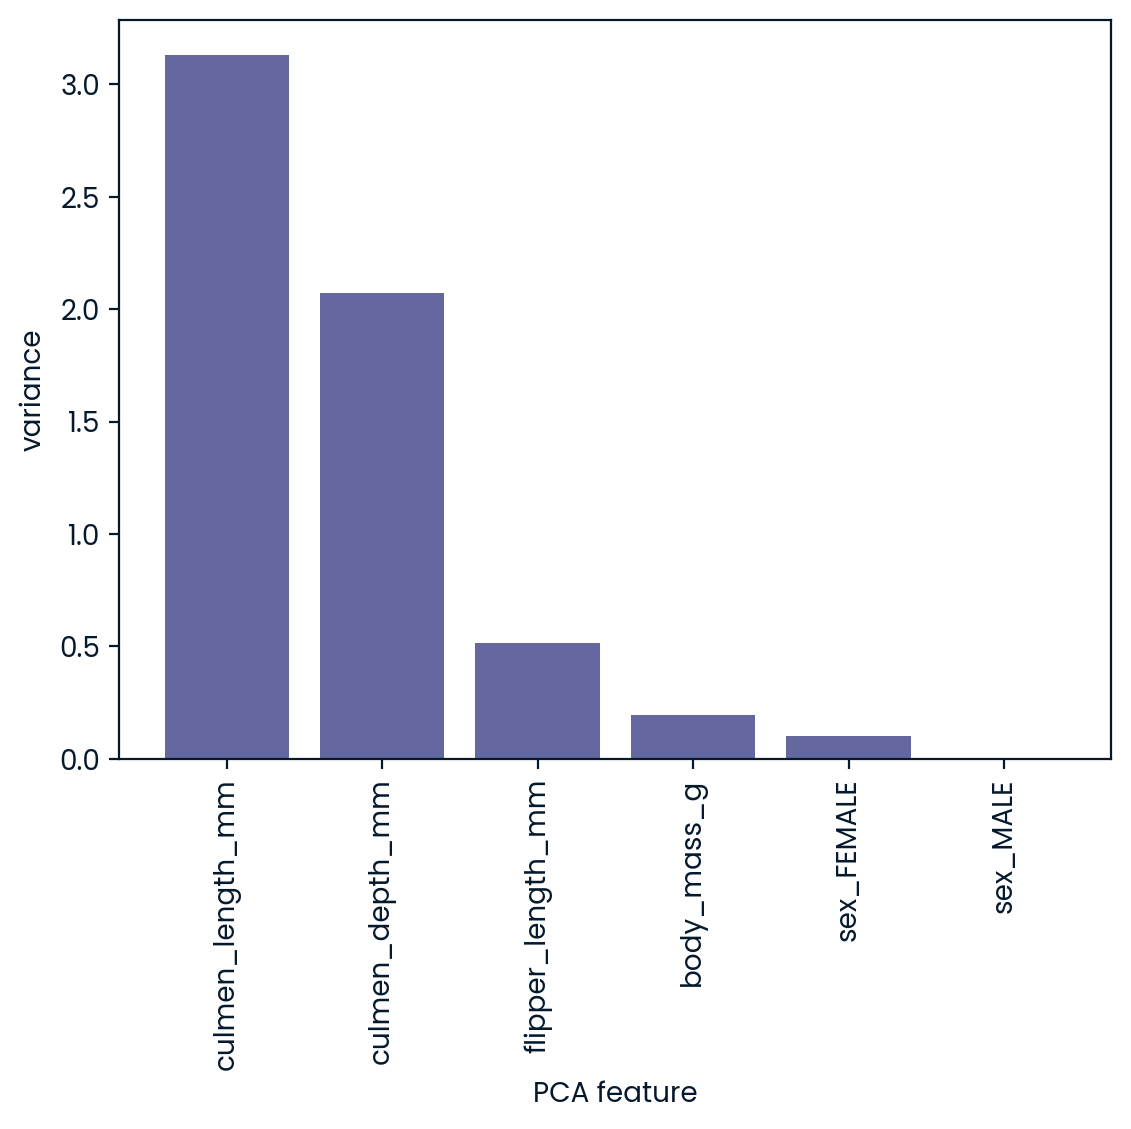

In [17]:
# Plot the explained variances
features = df.columns 
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(rotation=90)  # Rotate x-ticks for better readability
plt.show()

This bar plot tells us that only the first 2 features have all the variations in the data we need in order to describe the object, and by that we reduced the dataset dimensionality into only 2 features and we will see if we specify the `n_components=2` would it give us the same results or not?

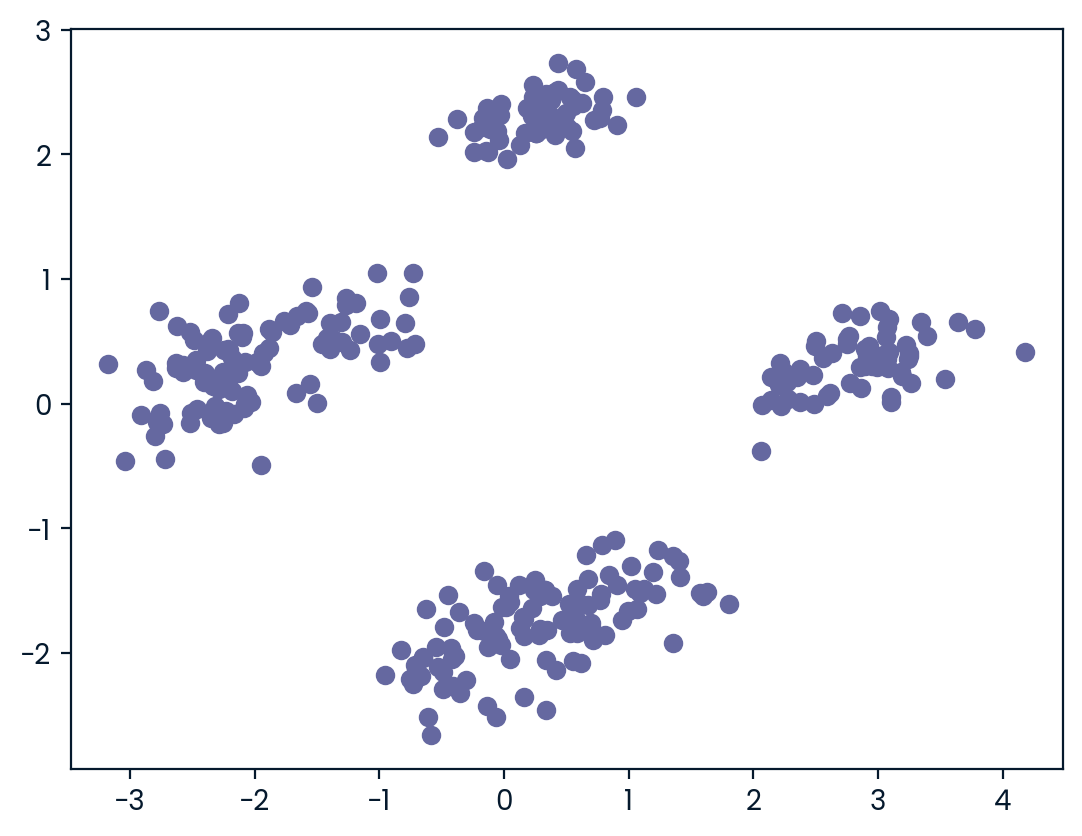

-4.828934832296766e-18 1.0000000000000369


In [18]:
model = PCA(n_components=2)
pca_features = model.fit_transform(standardized_features)
# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]
# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation,pvalue)

As you can see after we reduced the features into 2 components we still have not lost any of the information :) .